In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import robust_scale
from sklearn.preprocessing import QuantileTransformer

In [3]:
Data=pd.read_csv("./data/Test.csv",encoding='utf-8')
Data=Data[Data['A']=='v']
Data=Data.filter(['State','Felony_sentence_aver','GDP_penalty','Temper','GDP','Education','Happy','PCPI','Police_area','older_rate','MSA_Rate','Female_Rate','Traveler_spending','Misdemeanor_Result','Felony_Result','Gun_ownership'])
Data

,State,Felony_sentence_aver,GDP_penalty,Temper,GDP,Education,Happy,PCPI,Police_area,older_rate,MSA_Rate,Female_Rate,Traveler_spending,Misdemeanor_Result,Felony_Result,Gun_ownership
16,Alabama,402.000,72.0450,17.1,228142.6,9717,40.28,44145,0.617114,17.4,75.183294,51.7,11513.8,1209.924,2150.976,50.0
17,Arizona,246.000,296.0953,15.7,370119.1,8373,53.47,46058,1.640300,18.0,95.153404,50.3,21582.8,2534.560,633.640,37.0
18,California,333.600,3132.8006,15.2,3132800.6,12664,61.14,66619,2.119850,14.8,97.881146,50.3,148446.9,2266.960,566.740,18.0
19,Connecticut,315.000,307.0103,9.4,287822.2,20147,59.23,77289,0.068367,17.6,94.941978,51.2,12231.5,1515.915,355.585,18.0
20,Florida,447.000,1475.3335,21.5,1106500.1,9663,50.58,52426,0.810971,20.9,96.784140,51.1,102843.7,2005.275,668.425,29.0
21,Idaho,936.000,83.6655,6.9,83665.5,7846,59.58,45968,1.352788,16.2,74.284112,49.9,5656.0,1337.544,377.256,53.0
22,Illinois,240.000,483.0453,11.0,885583.0,15912,50.14,58764,0.714276,16.1,88.753778,50.9,41750.0,1668.642,681.558,24.0
23,Iowa,417.000,66.7399,8.8,194658.1,11724,59.65,51865,0.971620,17.5,61.267325,50.2,9210.9,1722.084,352.716,38.0
24,Kansas,396.750,132.3698,12.4,176493.1,11095,49.16,53426,0.968618,16.4,69.537956,50.2,8133.0,1582.020,1519.980,43.0
25,Kentucky,402.000,574.3971,13.1,215398.9,11081,38.29,43770,0.615641,16.9,58.511802,50.7,10211.7,1508.376,709.824,49.0


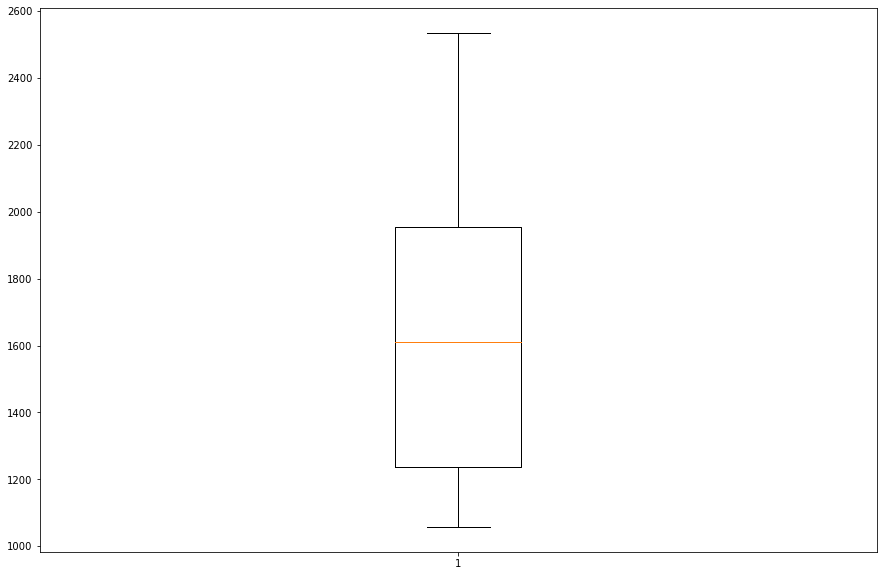

In [4]:
# 경범죄 데이터에 이상치가 있나 확인하기 위해서 box plot

plt.figure(figsize=(15,10))
plt.boxplot(Data['Misdemeanor_Result'])
plt.show()

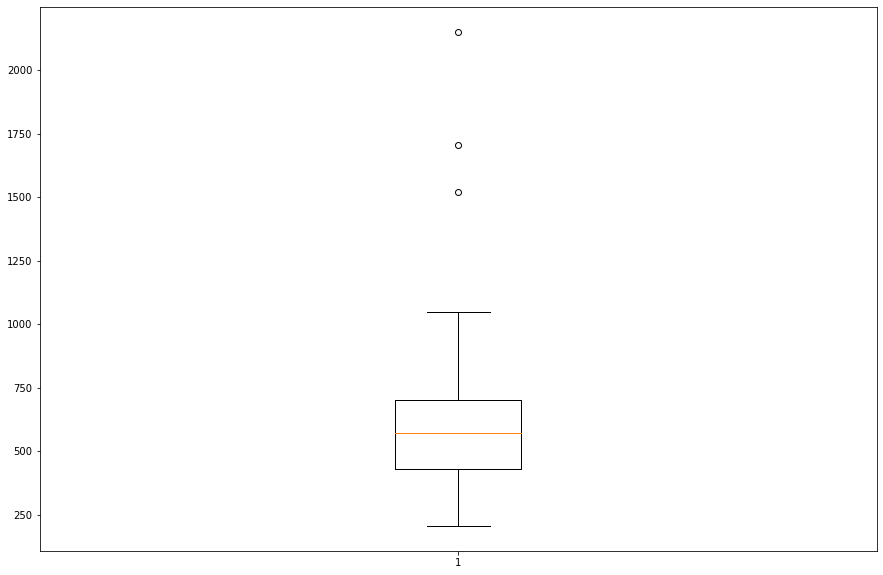

In [5]:
# 중범죄 데이터에 이상치가 있나 확인하기 위해서 box plot

plt.figure(figsize=(15,10))
plt.boxplot(Data['Felony_Result'])
plt.show()

In [9]:
# logit으로 돌리기 위해서 y값을 0~1사이의 값으로 minmaxscaleing

mis_Y=minmax_scale(Data['Misdemeanor_Result'], axis=0, copy=True)
Data['Test_misdemeanor']=mis_Y
fel_Y=minmax_scale(Data['Felony_Result'],axis=0,copy=True)
Data['Test_felony']=fel_Y
#Data

In [10]:
model_gun = sm.Logit(Data['Test_misdemeanor'], np.log(Data['Gun_ownership']))
result_gun = model_gun.fit()
print(result_gun.summary())

Optimization terminated successfully.
         Current function value: 0.664135
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                -0.03965
Time:                        11:22:49   Log-Likelihood:                -19.924
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Gun_ownership    -0.1104      0.108     -1.024      0.306      -0.322       0.101


# GDP

Optimization terminated successfully.
         Current function value: 0.666423
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                -0.04323
Time:                        12:12:43   Log-Likelihood:                -19.993
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GDP           -0.0287      0.029     -0.988      0.323      -0.086       0.028


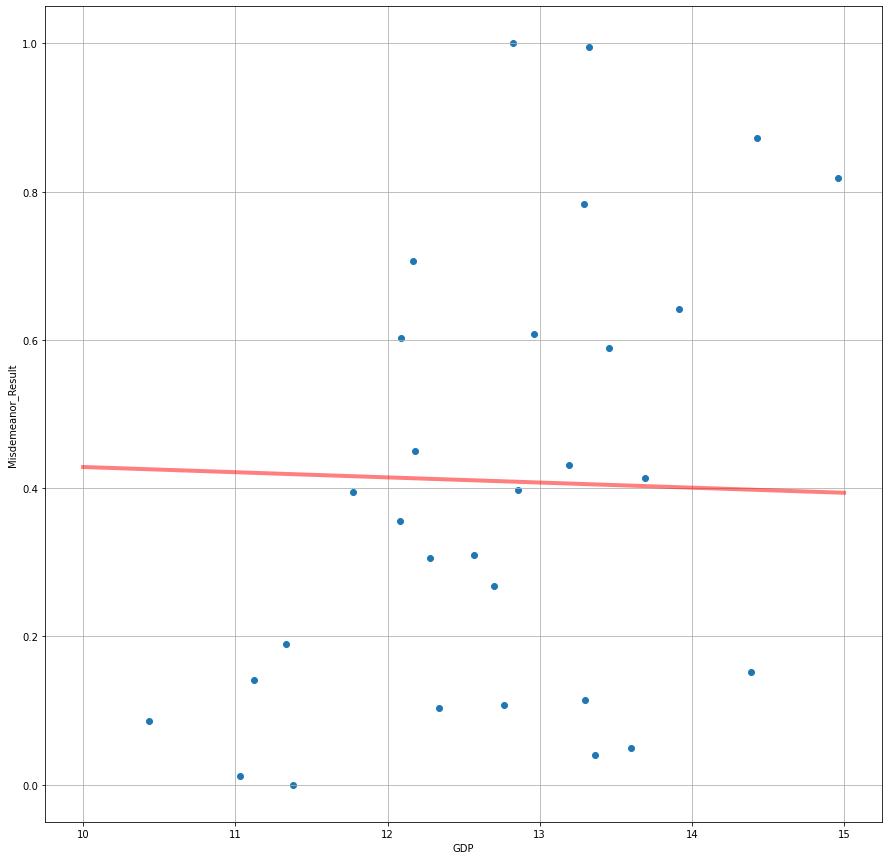

In [92]:
model_GDP = sm.Logit(Data['Test_misdemeanor'],np.log(Data['GDP']))
result_GDP = model_GDP.fit()
print(result_GDP.summary())

plt.figure(figsize=(15,15))
plt.scatter(np.log(Data['GDP']),Data['Test_misdemeanor'])

xx = np.linspace(10,15, 100)
df_wrole_p = pd.DataFrame({"GDP": xx})
plt.plot(xx, result_GDP.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('GDP')
plt.ylabel('Misdemeanor_Result')
plt.show()

# GDP_penalty

Optimization terminated successfully.
         Current function value: 0.676425
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                -0.05889
Time:                        12:17:28   Log-Likelihood:                -20.293
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
GDP_penalty    -0.0508      0.065     -0.777      0.437      -0.179       0.077


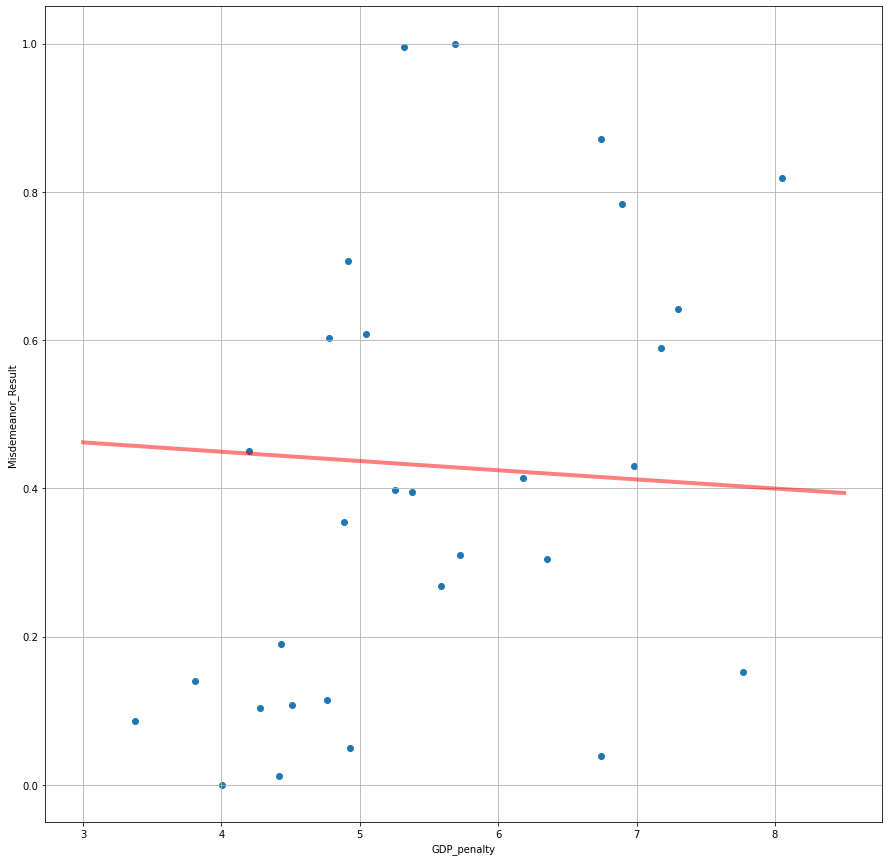

In [98]:
model_GDP_penalty = sm.Logit(Data['Test_misdemeanor'],np.log(Data['GDP_penalty']))
result_GDP_penalty = model_GDP_penalty.fit()
print(result_GDP_penalty.summary())

plt.figure(figsize=(15,15))
plt.scatter(np.log(Data['GDP_penalty']),Data['Test_misdemeanor'])

xx = np.linspace(3,8.5, 100)
df_wrole_p = pd.DataFrame({"GDP_penalty": xx})
plt.plot(xx, result_GDP_penalty.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('GDP_penalty')
plt.ylabel('Misdemeanor_Result')
plt.show()

# Temper

Optimization terminated successfully.
         Current function value: 0.686606
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                -0.07483
Time:                        12:17:18   Log-Likelihood:                -20.598
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temper        -0.0159      0.032     -0.491      0.623      -0.079       0.047


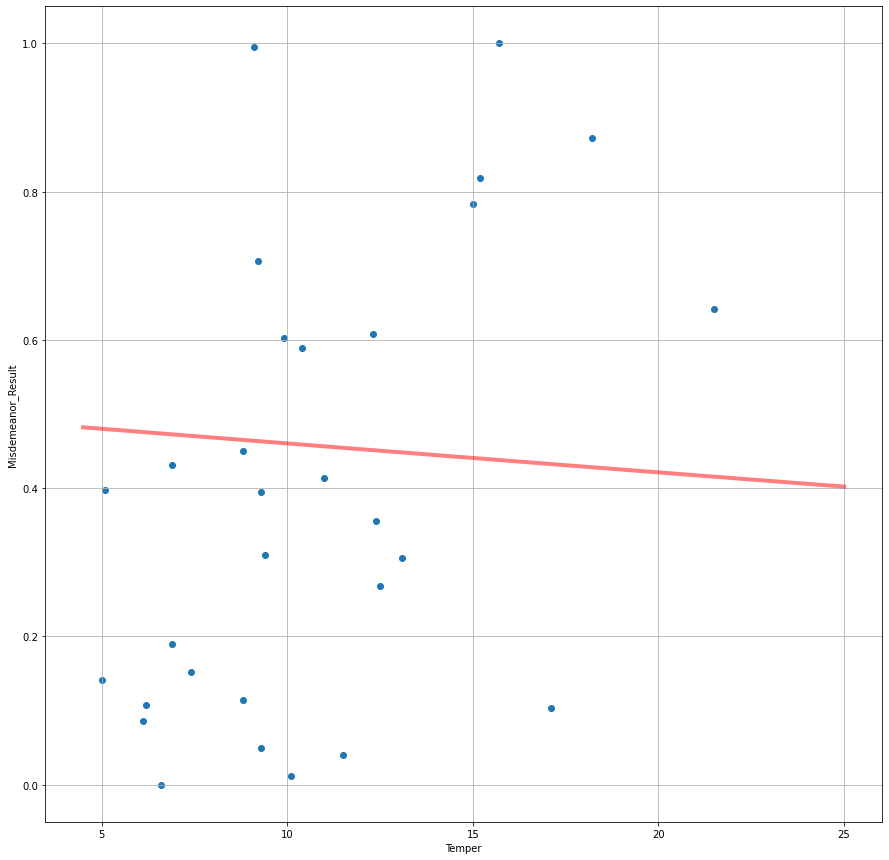

In [97]:
model_Temper = sm.Logit(Data['Test_misdemeanor'],Data['Temper'])
result_Temper = model_Temper.fit()
print(result_Temper.summary())

plt.figure(figsize=(15,15))
plt.scatter(Data['Temper'],Data['Test_misdemeanor'])

xx = np.linspace(4.5,25, 100)
df_wrole_p = pd.DataFrame({"Temper": xx})
plt.plot(xx, result_Temper.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('Temper')
plt.ylabel('Misdemeanor_Result')
plt.show()

# Education

Optimization terminated successfully.
         Current function value: 0.625039
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                 0.02155
Time:                        12:18:07   Log-Likelihood:                -18.751
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Education  -4.336e-05   2.76e-05     -1.569      0.117   -9.75e-05    1.08e-05


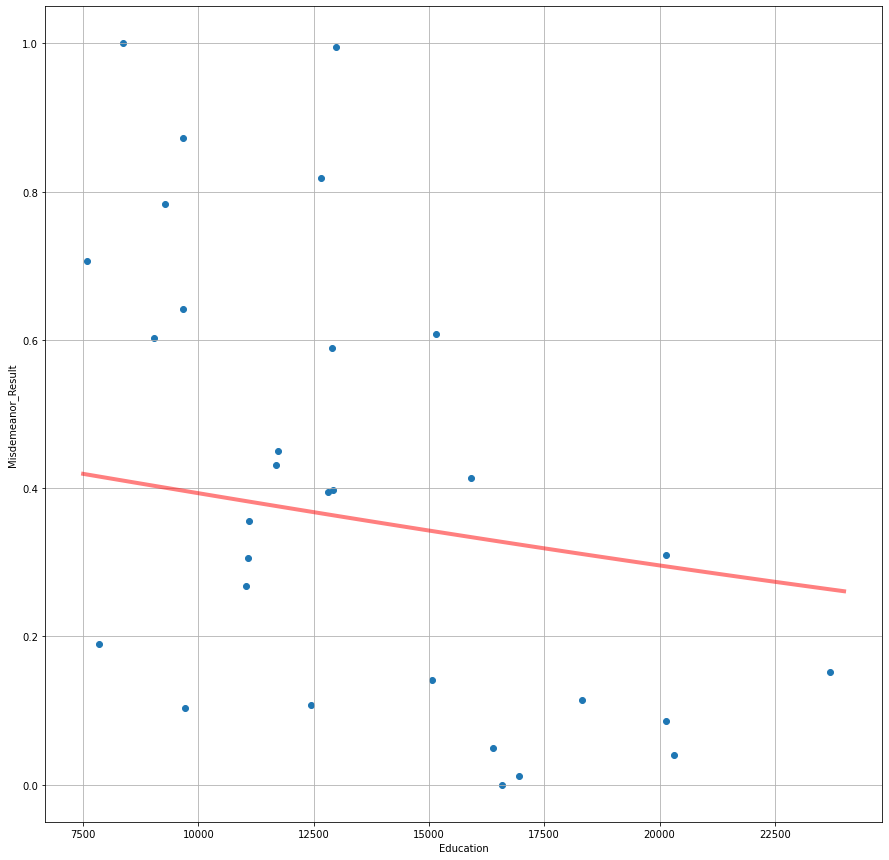

In [101]:
model_Education = sm.Logit(Data['Test_misdemeanor'],Data['Education'])
result_Education = model_Education.fit()
print(result_Education.summary())

plt.figure(figsize=(15,15))
plt.scatter(Data['Education'],Data['Test_misdemeanor'])

xx = np.linspace(7500,24000, 100)
df_wrole_p = pd.DataFrame({"Education": xx})
plt.plot(xx, result_Education.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('Education')
plt.ylabel('Misdemeanor_Result')
plt.show()

# Happy

Optimization terminated successfully.
         Current function value: 0.663033
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                -0.03793
Time:                        12:20:53   Log-Likelihood:                -19.891
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Happy         -0.0072      0.007     -1.047      0.295      -0.021       0.006


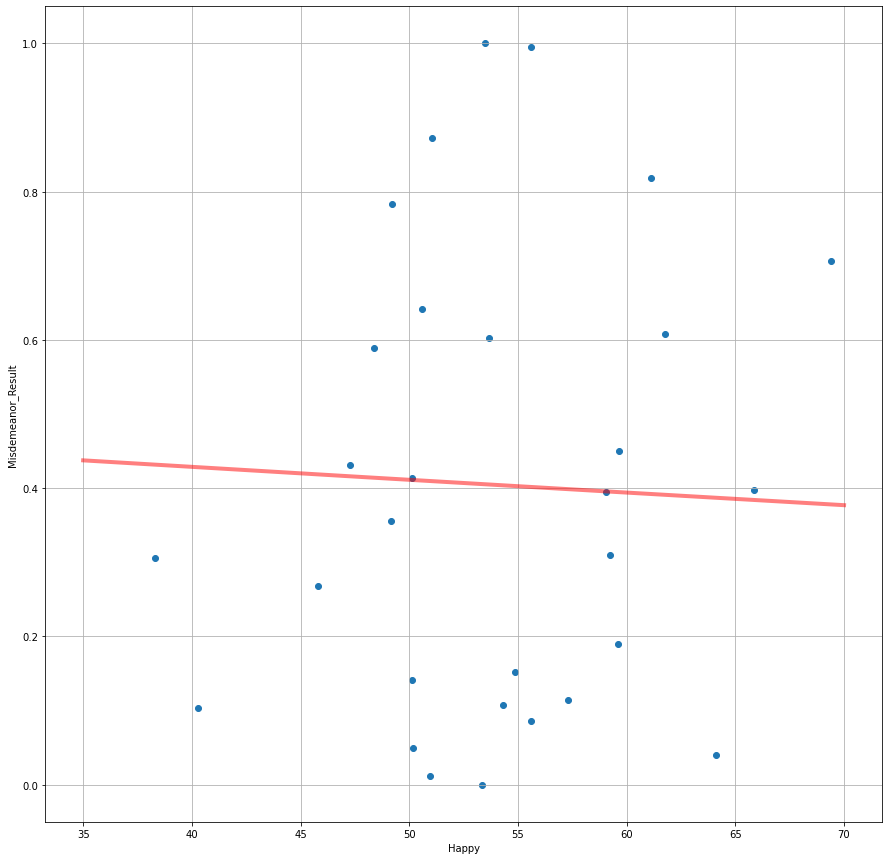

In [104]:
model_Happy = sm.Logit(Data['Test_misdemeanor'],Data['Happy'])
result_Happy= model_Happy.fit()
print(result_Happy.summary())

plt.figure(figsize=(15,15))
plt.scatter(Data['Happy'],Data['Test_misdemeanor'])

xx = np.linspace(35,70, 1000)
df_wrole_p = pd.DataFrame({"Happy": xx})
plt.plot(xx, result_Happy.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('Happy')
plt.ylabel('Misdemeanor_Result')
plt.show()

# PCPI

Optimization terminated successfully.
         Current function value: 0.654791
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                -0.02502
Time:                        12:21:50   Log-Likelihood:                -19.644
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PCPI       -7.825e-06   6.59e-06     -1.187      0.235   -2.08e-05     5.1e-06


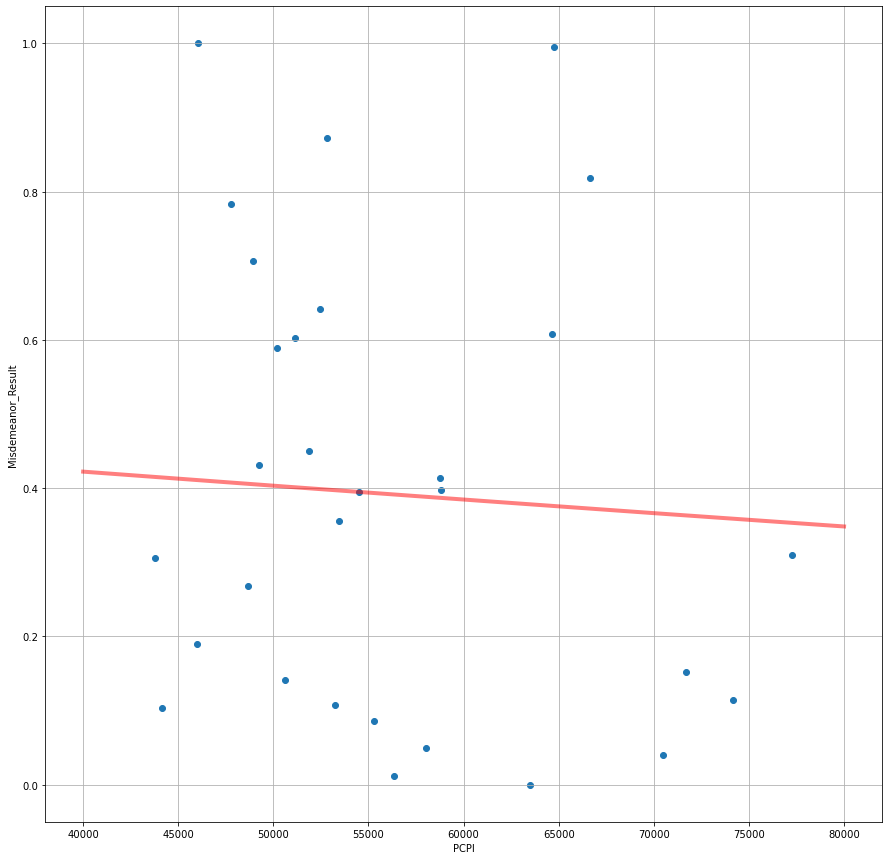

In [107]:
model_PCPI = sm.Logit(Data['Test_misdemeanor'],Data['PCPI'])
result_PCPI = model_PCPI.fit()
print(result_PCPI.summary())

plt.figure(figsize=(15,15))
plt.scatter(Data['PCPI'],Data['Test_misdemeanor'])

xx = np.linspace(40000,80000, 1000)
df_wrole_p = pd.DataFrame({"PCPI": xx})
plt.plot(xx, result_PCPI.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('PCPI')
plt.ylabel('Misdemeanor_Result')
plt.show()

# Police_area

Optimization terminated successfully.
         Current function value: 0.685174
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                -0.07259
Time:                        12:22:50   Log-Likelihood:                -20.555
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Police_area     0.1648      0.304      0.542      0.588      -0.431       0.760


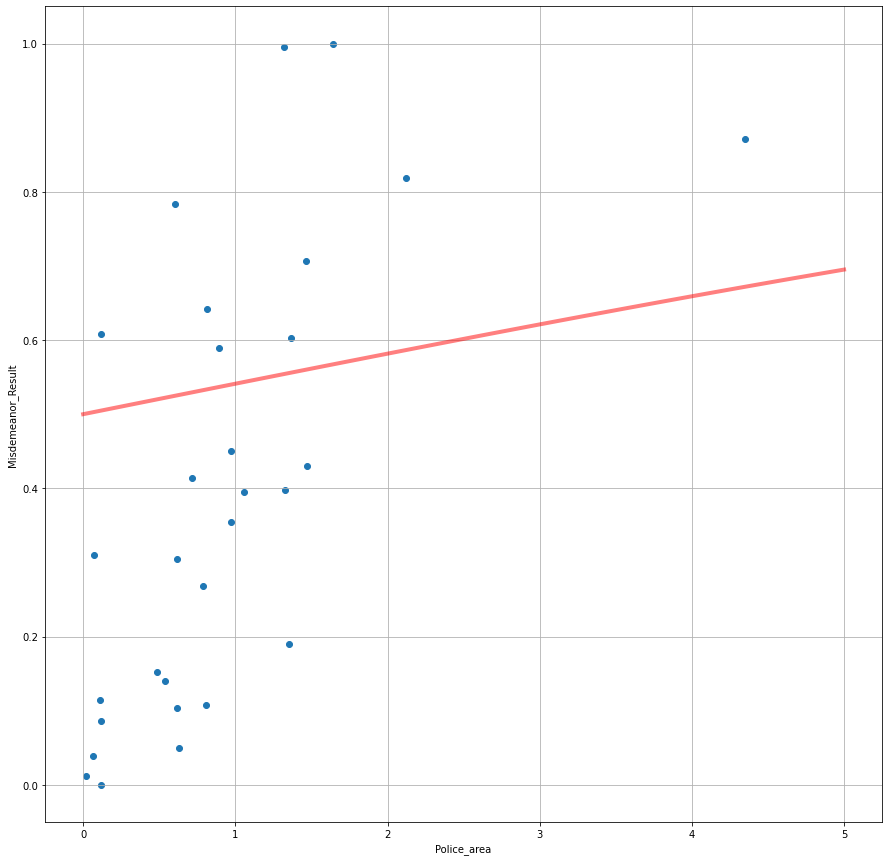

In [109]:
model_Police_area = sm.Logit(Data['Test_misdemeanor'],Data['Police_area'])
result_Police_area = model_Police_area.fit()
print(result_Police_area.summary())

plt.figure(figsize=(15,15))
plt.scatter(Data['Police_area'],Data['Test_misdemeanor'])

xx = np.linspace(0,5, 100)
df_wrole_p = pd.DataFrame({"Police_area": xx})
plt.plot(xx, result_Police_area.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('Police_area')
plt.ylabel('Misdemeanor_Result')
plt.show()

# older_rate

Optimization terminated successfully.
         Current function value: 0.649432
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                -0.01663
Time:                        12:23:41   Log-Likelihood:                -19.483
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
older_rate    -0.0277      0.022     -1.262      0.207      -0.071       0.015


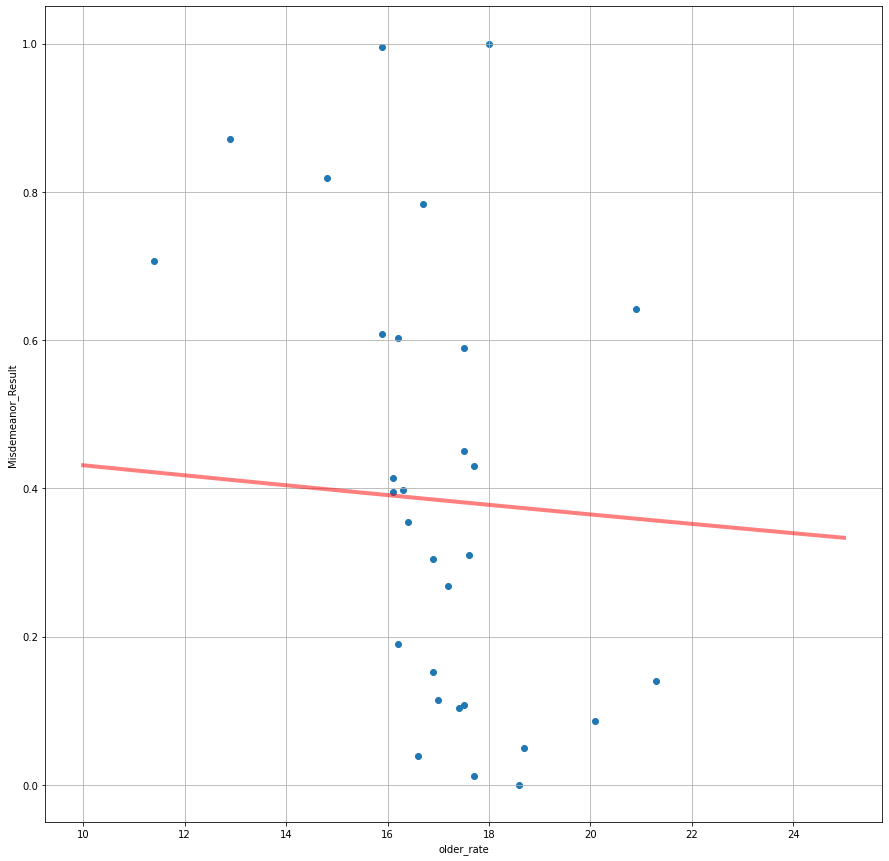

In [112]:
model_older_rate = sm.Logit(Data['Test_misdemeanor'],Data['older_rate'])
result_older_rate = model_older_rate.fit()
print(result_older_rate.summary())

plt.figure(figsize=(15,15))
plt.scatter(Data['older_rate'],Data['Test_misdemeanor'])

xx = np.linspace(10,25, 100)
df_wrole_p = pd.DataFrame({"older_rate": xx})
plt.plot(xx, result_older_rate.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('older_rate')
plt.ylabel('Misdemeanor_Result')
plt.show()

# MSA_Rate

Optimization terminated successfully.
         Current function value: 0.671608
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                -0.05135
Time:                        12:25:06   Log-Likelihood:                -20.148
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MSA_Rate      -0.0040      0.004     -0.893      0.372      -0.013       0.005


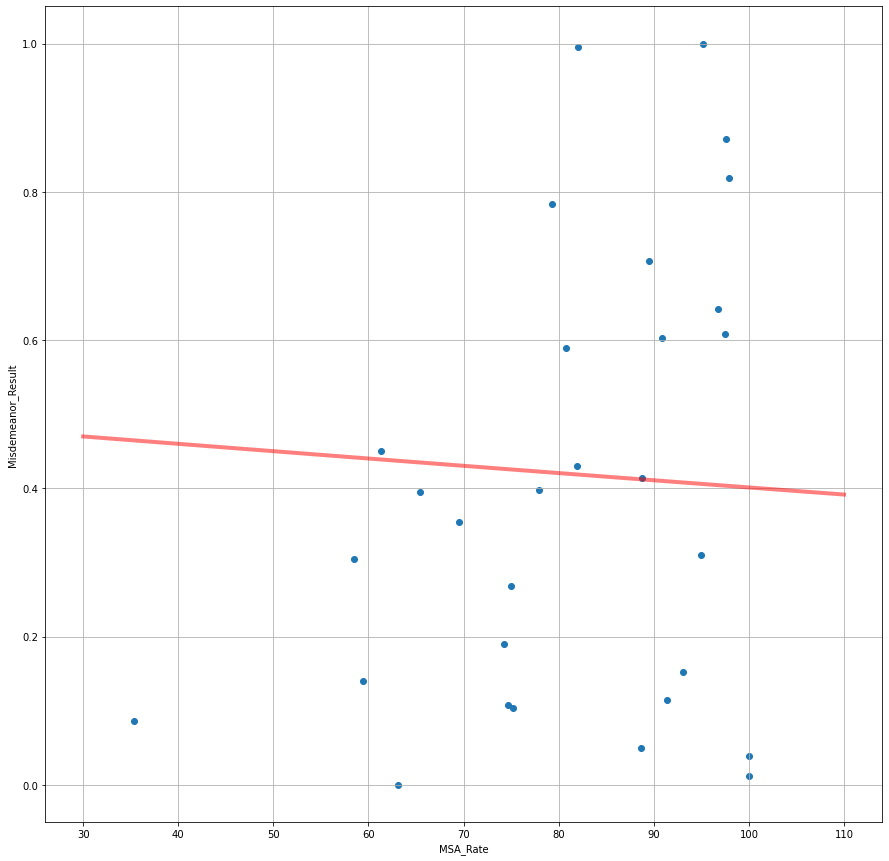

In [115]:
model_MSA_Rate = sm.Logit(Data['Test_misdemeanor'],Data['MSA_Rate'])
result_MSA_Rate = model_MSA_Rate.fit()
print(result_MSA_Rate.summary())

plt.figure(figsize=(15,15))
plt.scatter(Data['MSA_Rate'],Data['Test_misdemeanor'])

xx = np.linspace(30,110, 100)
df_wrole_p = pd.DataFrame({"MSA_Rate": xx})
plt.plot(xx, result_MSA_Rate.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('MSA_Rate')
plt.ylabel('Misdemeanor_Result')
plt.show()

# Female_Rate

Optimization terminated successfully.
         Current function value: 0.658488
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                -0.03081
Time:                        12:26:26   Log-Likelihood:                -19.755
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Female_Rate    -0.0083      0.007     -1.124      0.261      -0.023       0.006


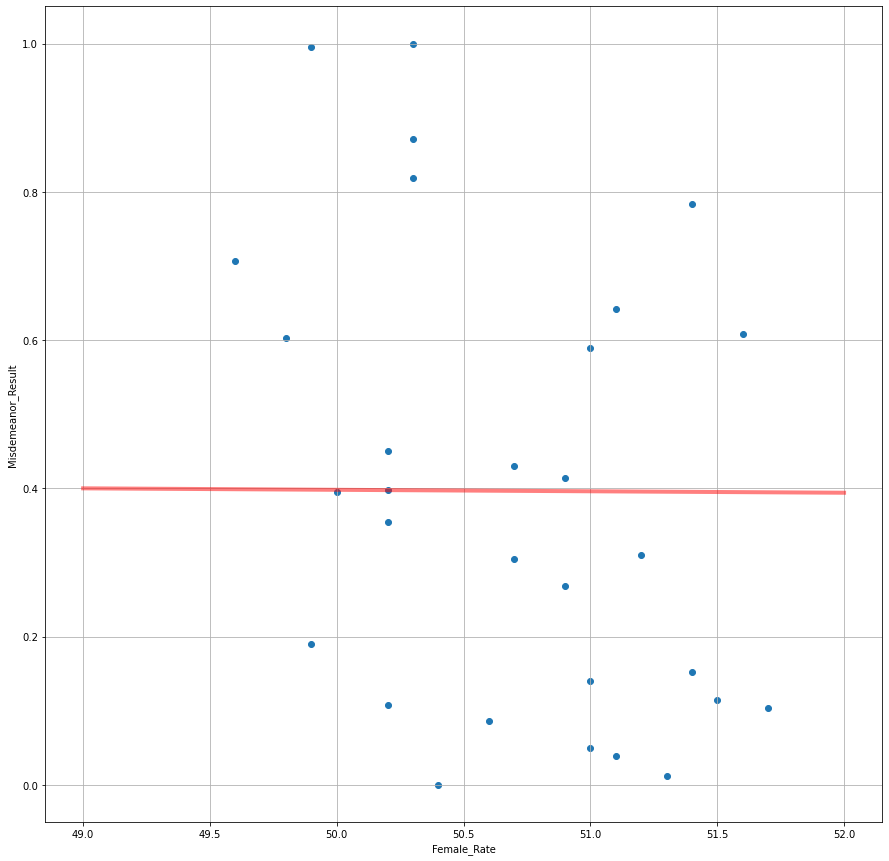

In [119]:
model_Female_Rate = sm.Logit(Data['Test_misdemeanor'],Data['Female_Rate'])
result_Female_Rate = model_Female_Rate.fit()
print(result_Female_Rate.summary())

plt.figure(figsize=(15,15))
plt.scatter(Data['Female_Rate'],Data['Test_misdemeanor'])

xx = np.linspace(49,52, 100)
df_wrole_p = pd.DataFrame({"Female_Rate": xx})
plt.plot(xx, result_Female_Rate.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('Female_Rate')
plt.ylabel('Misdemeanor_Result')
plt.show()

# Traveler_spending

Optimization terminated successfully.
         Current function value: 0.691960
         Iterations 2
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Fri, 14 May 2021   Pseudo R-squ.:                -0.08321
Time:                        12:27:17   Log-Likelihood:                -20.759
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                       nan
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Traveler_spending  1.751e-06   8.43e-06      0.208      0.835   -1.48e-05    1.83e-05


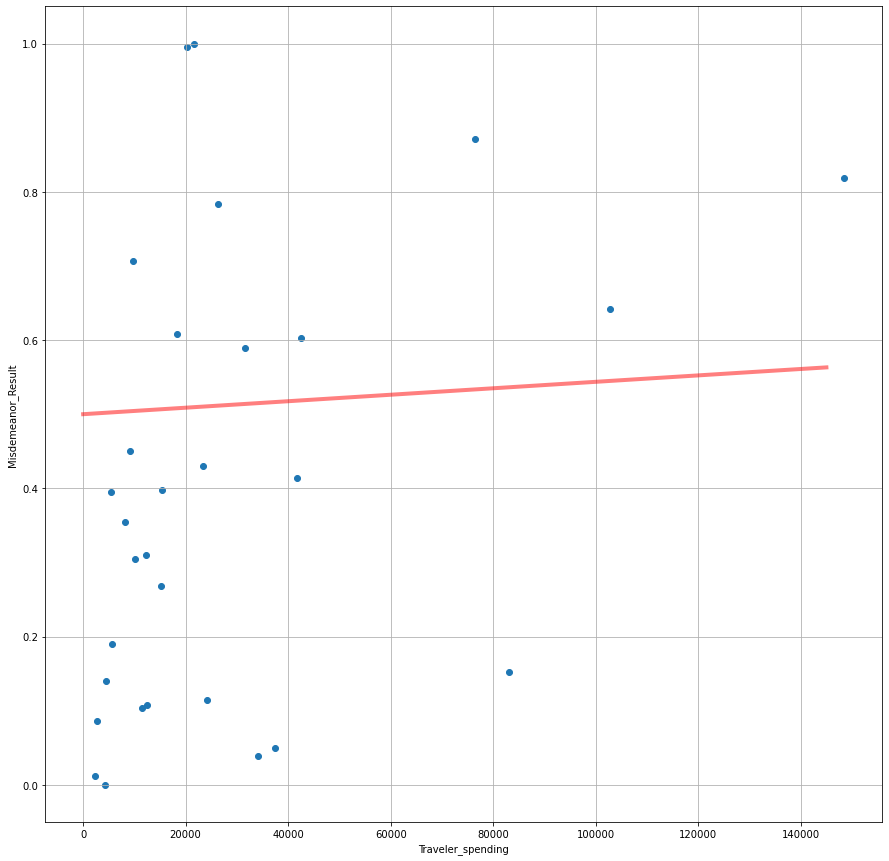

In [121]:
model_Traveler_spending = sm.Logit(Data['Test_misdemeanor'],Data['Traveler_spending'])
result_Traveler_spending = model_Traveler_spending.fit()
print(result_Traveler_spending.summary())

plt.figure(figsize=(15,15))
plt.scatter(Data['Traveler_spending'],Data['Test_misdemeanor'])

xx = np.linspace(0,145000, 100)
df_wrole_p = pd.DataFrame({"Traveler_spending": xx})
plt.plot(xx, result_Traveler_spending.predict(xx), "r-", lw=4, label="예측",alpha=.5)
plt.grid(True)
plt.xlabel('Traveler_spending')
plt.ylabel('Misdemeanor_Result')
plt.show()

In [74]:
# 모든 feature를 한꺼번에 logit

test_Data=Data[['Test_misdemeanor','GDP_penalty','Temper','GDP','Education','Happy','PCPI','Police_area','older_rate','MSA_Rate','Female_Rate','Traveler_spending']]
x_data=test_Data.columns[1:]
logit = sm.Logit(test_Data['Test_misdemeanor'], test_Data[x_data])
result = logit.fit() 
print( result.summary())

Optimization terminated successfully.
         Current function value: 0.444834
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                           10
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.3036
Time:                        11:38:27   Log-Likelihood:                -13.345
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                    0.3100
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
GDP_penalty           0.0012      0.002      0.738      0.461      -0.002       0.005
Temper  

In [129]:
test_Data=Data[['Test_misdemeanor','Education','PCPI']]
x_data=test_Data.columns[1:]
logit = sm.Logit(test_Data['Test_misdemeanor'], test_Data[x_data])
result = logit.fit() 
print( result.summary())

Optimization terminated successfully.
         Current function value: 0.505422
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.2088
Time:                        12:31:57   Log-Likelihood:                -15.163
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                  0.004670
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Education     -0.0004      0.000     -2.066      0.039      -0.001   -2.06e-05
PCPI        8.628e-05   4.49e

In [130]:
test_Data=Data[['Test_misdemeanor','Female_Rate','Police_area']]
x_data=test_Data.columns[1:]
logit = sm.Logit(test_Data['Test_misdemeanor'], test_Data[x_data])
result = logit.fit() 
print( result.summary())

Optimization terminated successfully.
         Current function value: 0.524391
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.1791
Time:                        12:32:45   Log-Likelihood:                -15.732
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                  0.008791
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Female_Rate    -0.0324      0.015     -2.116      0.034      -0.063      -0.002
Police_area     1.3632    

In [132]:
test_Data=Data[['Test_misdemeanor','Temper','Happy']]
x_data=test_Data.columns[1:]
logit = sm.Logit(test_Data['Test_misdemeanor'], test_Data[x_data])
result = logit.fit() 
print( result.summary())

Optimization terminated successfully.
         Current function value: 0.623443
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Test_misdemeanor   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 May 2021   Pseudo R-squ.:                 0.02405
Time:                        12:33:32   Log-Likelihood:                -18.703
converged:                       True   LL-Null:                       -19.164
Covariance Type:            nonrobust   LLR p-value:                    0.3370
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temper         0.0978      0.084      1.161      0.246      -0.067       0.263
Happy         -0.0262      0.